In [2]:
import pandas as pd
from rdkit import Chem
from rdkit.Chem import Draw
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv("hf://datasets/openadmet/openadmet-expansionrx-challenge-teaser/expansion_data_teaser.csv")

# Display the first few rows
df.head()


,Molecule Name,SMILES,LogD,KSOL,HLM CLint,MLM CLint,Caco-2 Permeability Papp A>B,Caco-2 Permeability Efflux,MPPB,MBPB,MGMB
0,E-0001321,CN1CCC[C@H]1COc1ccc(-c2nc3cc(-c4ccc5[nH]c(-c6c...,NaN,NaN,56.4,182.3,NaN,NaN,NaN,NaN,NaN
1,E-0001780,COc1ccc2c(c1)c1cc3cnccc3c(C)c1n2C,NaN,NaN,160.4,1351.1,NaN,NaN,NaN,NaN,NaN
2,E-0001827,Cc1c2ccncc2cc2c3cc(OCCCN4CCN(C)CC4)ccc3n(C)c12,NaN,NaN,NaN,193.5,NaN,NaN,NaN,NaN,NaN
3,E-0002019,CN(C)CCCOc1ccc(-c2nc3cc(NC(=O)c4ccc5[nH]c(-c6c...,NaN,NaN,9.5,NaN,NaN,NaN,NaN,NaN,NaN
4,E-0002036,CN(C)CCCOc1ccc2nc(-c3ccc(-c4nc5ccc(OCCCN(C)C)c...,NaN,NaN,NaN,162.0,NaN,NaN,NaN,NaN,0.0122


In [4]:
# Count missing values
print('This is how many missing values are in the dataset:')
df.isnull().sum()


This is how many missing values are in the dataset:


Molecule Name                     0
SMILES                            0
LogD                            253
KSOL                             86
HLM CLint                        72
MLM CLint                        19
Caco-2 Permeability Papp A>B    311
Caco-2 Permeability Efflux      311
MPPB                            284
MBPB                            504
MGMB                            531
dtype: int64

In [5]:
# Count how many molecules have each property filled in
print('This is how many molecules have each property filled in:')
df.count()


This is how many molecules have each property filled in:


Molecule Name                   532
SMILES                          532
LogD                            279
KSOL                            446
HLM CLint                       460
MLM CLint                       513
Caco-2 Permeability Papp A>B    221
Caco-2 Permeability Efflux      221
MPPB                            248
MBPB                             28
MGMB                              1
dtype: int64

In [6]:
# Summarize numeric columns (mean, std, min, max)
df.describe()


,LogD,KSOL,HLM CLint,MLM CLint,Caco-2 Permeability Papp A>B,Caco-2 Permeability Efflux,MPPB,MBPB,MGMB
count,279.000000,446.000000,460.000000,513.000000,221.000000,221.000000,248.000000,28.000000,1.0000
mean,2.712545,74.937122,50.858913,932.960819,18.978778,2.426471,10.984677,8.757857,0.0122
std,1.164533,70.044570,89.079813,1174.498166,12.130905,7.255503,14.788693,20.454538,NaN
min,-0.600000,0.020000,0.000000,6.300000,0.050000,0.410000,0.000000,0.000000,0.0122
25%,1.850000,6.582500,10.375000,212.000000,7.880000,0.800000,1.700000,0.300000,0.0122
50%,2.800000,63.600000,20.100000,535.200000,19.980000,0.980000,4.450000,0.770000,0.0122
75%,3.700000,121.000000,51.425000,1222.400000,27.910000,1.300000,14.375000,4.432500,0.0122
max,5.000000,254.000000,932.100000,8181.600000,47.540000,73.050000,74.100000,80.000000,0.0122


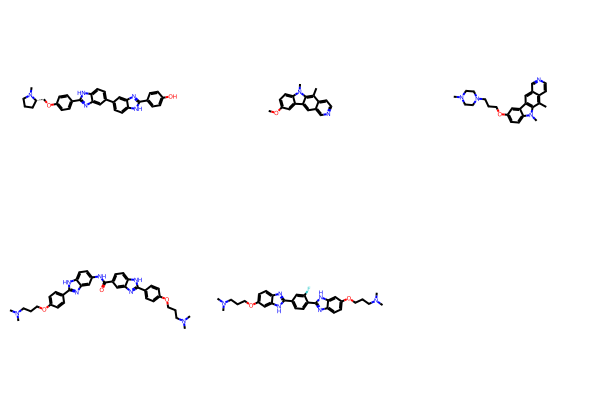

In [7]:
# Convert SMILES to molecule objects
mols = [Chem.MolFromSmiles(s) for s in df['SMILES'][:5]]

# Draw molecules
Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=(200,200))


In [8]:
# Define which columns are actual experimental endpoints
endpoint_cols = [
    'LogD',
    'KSOL',
    'HLM CLint',
    'MLM CLint',
    'Caco-2 Permeability Papp A>B',
    'Caco-2 Permeability Efflux',
    'MPPB',
    'MBPB',
    'MGMB'
]

# Count non-null values only for endpoints
non_null_counts = df[endpoint_cols].notnull().sum()

# Identify the most populous endpoint
most_populous_endpoint = non_null_counts.idxmax()
most_populous_count = non_null_counts.max()

print(f"Most populous endpoint: {most_populous_endpoint} ({most_populous_count} measured molecules)")


Most populous endpoint: MLM CLint (513 measured molecules)


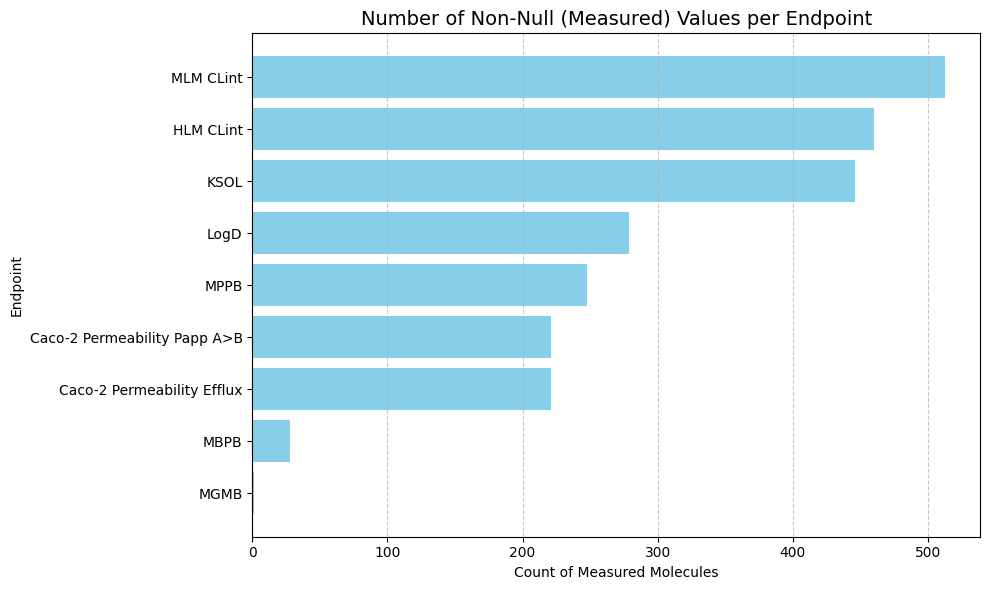

In [9]:
import matplotlib.pyplot as plt

# Define the experimental endpoint columns
endpoint_cols = [
    'LogD',
    'KSOL',
    'HLM CLint',
    'MLM CLint',
    'Caco-2 Permeability Papp A>B',
    'Caco-2 Permeability Efflux',
    'MPPB',
    'MBPB',
    'MGMB'
]

# Count how many molecules have non-null values for each endpoint
non_null_counts = df[endpoint_cols].notnull().sum().sort_values(ascending=False)

# Plot as a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(non_null_counts.index, non_null_counts.values, color='skyblue')
plt.gca().invert_yaxis()  # Most populous at the top
plt.title("Number of Non-Null (Measured) Values per Endpoint", fontsize=14)
plt.xlabel("Count of Measured Molecules")
plt.ylabel("Endpoint")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


                                  LogD      KSOL  HLM CLint  MLM CLint  \
LogD                          1.000000 -0.653506   0.257720   0.327811   
KSOL                         -0.653506  1.000000  -0.201534  -0.232355   
HLM CLint                     0.257720 -0.201534   1.000000   0.349830   
MLM CLint                     0.327811 -0.232355   0.349830   1.000000   
Caco-2 Permeability Papp A>B -0.066768  0.150531  -0.001897  -0.132515   
Caco-2 Permeability Efflux   -0.247139 -0.040520  -0.093872  -0.097339   
MPPB                         -0.698500  0.256251  -0.207332  -0.226381   
MBPB                         -0.597587  0.142619  -0.235777  -0.317814   
MGMB                               NaN       NaN        NaN        NaN   

                              Caco-2 Permeability Papp A>B  \
LogD                                             -0.066768   
KSOL                                              0.150531   
HLM CLint                                        -0.001897   
MLM CLint  

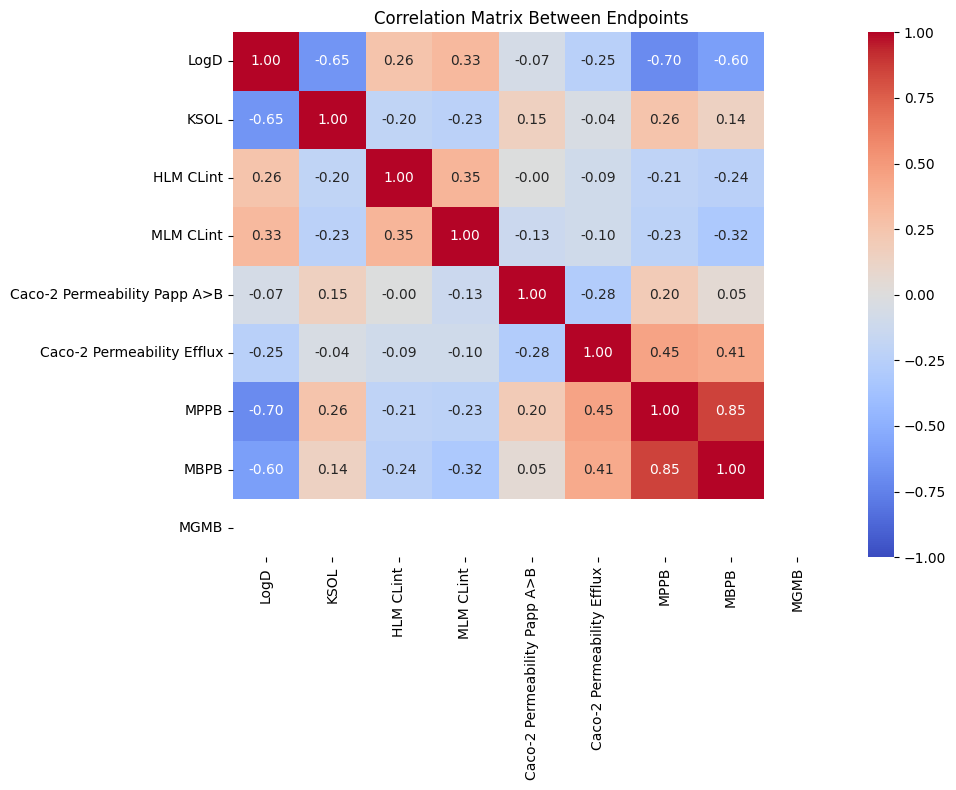

In [11]:
# Correlation between endpoints
print(df.corr(numeric_only=True))
import seaborn as sns

# Compute the correlation matrix for endpoint columns only
corr = df[endpoint_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f")
plt.title("Correlation Matrix Between Endpoints")
plt.tight_layout()
plt.show()
